In [221]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import explained_variance_score
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [222]:
area = pd.read_csv("wi_land_area.csv")

In [223]:
area = area.iloc[:,[0,23]] #most current measurement
area = area.iloc[3102:3174,:]
area = area.rename(columns={"Areaname": "name", "LND110210D": "area"}) 

In [224]:
area['name'] = area['name'].str[:-4] #strip to just county name
area = area.set_index('name')

In [225]:
df = pd.read_csv("county_data");

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [226]:
df = df.join(area, on = 'name')
del df['Unnamed: 0']
df['pop density'] = df['population']/df['area']

In [227]:
matplotlib.rcParams["font.size"] = 12

def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

In [228]:
df = df[df['positive'] > 9] #Limiting to counties where community spread is more likely
df

,name,positive,negative,deaths,total tests,percent positive,percent deaths,geometry,population,percent pop pos,percent pop tested,area,pop density
0,Milwaukee,2382.0,10359.0,150.0,12741,18.695550,6.294587,MULTIPOLYGON (((-88.0038199976383 43.192589052...,948201,0.251213,1.343702,241.40,3927.924606
1,Brown,455.0,1499.0,2.0,1954,23.285568,0.438596,MULTIPOLYGON (((-88.2501192432117 44.679782277...,263378,0.172756,0.741899,529.71,497.211682
2,Dane,387.0,7581.0,21.0,7968,4.856928,5.412371,"POLYGON ((-89.0091453050261 43.2848380086325, ...",542364,0.071354,1.469124,1197.24,453.011927
3,Kenosha,294.0,1588.0,6.0,1882,15.621679,2.033898,MULTIPOLYGON (((-88.08397896563579 42.66991396...,169290,0.173666,1.111702,271.99,622.412589
4,Waukesha,280.0,2944.0,14.0,3224,8.684864,4.982206,"POLYGON ((-88.4179931201656 43.1947050295068, ...",403072,0.069466,0.799857,549.57,733.431592
5,Racine,215.0,1592.0,10.0,1807,11.898174,4.629630,"POLYGON ((-87.8263041676683 42.8422370717163, ...",196584,0.109368,0.919200,332.50,591.230075
6,Walworth,100.0,595.0,7.0,695,14.388489,6.930693,"POLYGON ((-88.3063900494772 42.8421029780855, ...",103718,0.096415,0.670086,555.13,186.835516
7,Rock,99.0,1399.0,4.0,1498,6.608812,4.000000,"POLYGON ((-88.7770821881729 42.8427019504804, ...",163129,0.060688,0.918292,718.14,227.154872
8,Washington,90.0,1435.0,4.0,1525,5.901639,4.395604,"POLYGON ((-88.16087908383609 43.5429511014194,...",135693,0.066326,1.123860,430.70,315.052241
9,Ozaukee,80.0,749.0,9.0,829,9.650181,11.111111,"POLYGON ((-87.7918593101445 43.5430288904909, ...",89147,0.089739,0.929925,233.08,382.473829


In [229]:
train, test = train_test_split(df, test_size=0.5)

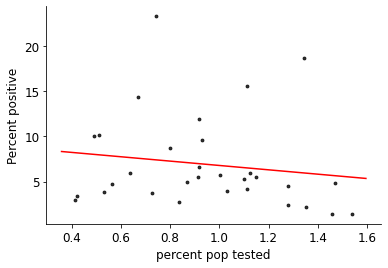

In [230]:


X_train = df[["percent pop tested"]].values.reshape(-1,1)
y_train = df[["percent positive"]].values.reshape(-1,1)

r = LR()
r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
df.plot.scatter(ax = ax, x = "percent pop tested", y = "percent positive", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
# ax.set_xlim(-7)
# ax.set_ylim(0)

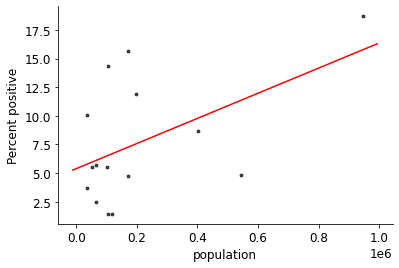

In [231]:
X_train = train[["population"]].values.reshape(-1,1)
y_train = train[["percent positive"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "population", y = "percent positive", s = 8, color = 'black', alpha = .7)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')


In [232]:
X_test = test[["population"]].values.reshape(-1,1)
y_test = test[["percent positive"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.2581362240143643, 0.14360501674966863)

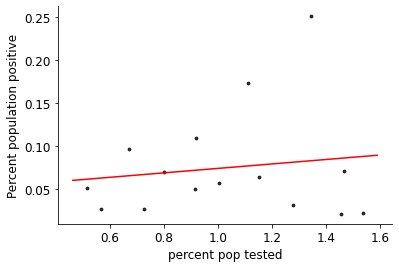

In [233]:
X_train = train[["percent pop tested"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent pop tested", y = "percent pop pos", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent population positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')

In [234]:
X_test = test[["percent pop tested"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.01905678082064044, 0.03437695232562954)

In [235]:
#outliers are densely populated cities like Milwaukee
slope

array([0.02586942])

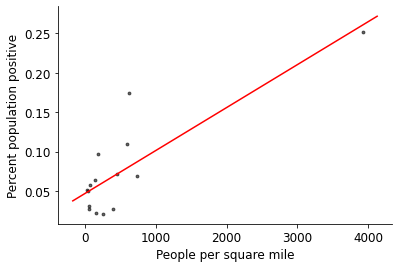

In [236]:
X_train = train[["pop density"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "pop density", y = "percent pop pos", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')

In [237]:
#line is best fit for population density and percent population positive
X_test = test[["pop density"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.697974280725068, 0.23358095039835058)

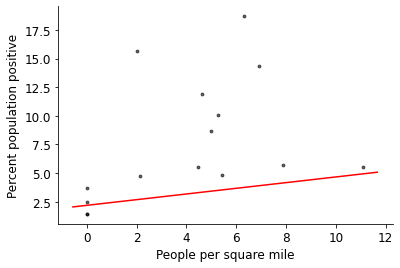

In [238]:
#trivial exmaple?
X_train = train[["percent positive"]].values.reshape(-1,1)
y_train = train[["percent deaths"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent deaths", y = "percent positive", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')